In [23]:
# Import required modules
from obspy.clients.fdsn import Client
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
# Select FDSN client
c = Client("USGS")

In [11]:
# Get catalogue. USGS limits number of events so had to set minmagnitude = 6
cat = c.get_events(minmagnitude=6, starttime=UTCDateTime(1900, 1, 1))

In [118]:
# Make dataframe from catalogue
times = []
lats = []
lons = []
deps = []
magnitudes = []
magnitudestype = []
locnames = []
for event in cat:
    if len(event.origins) != 0 and len(event.magnitudes) != 0:
        if len(event.event_descriptions) == 0:
            locname="unknown"
        else:
            locname = event.event_descriptions[0].text
        if locname == "offshore Bio-Bio, Chile":
            locname = "2010 " + locname
        times.append(event.origins[0].time.datetime)
        lats.append(event.origins[0].latitude)
        lons.append(event.origins[0].longitude)
        deps.append(event.origins[0].depth)
        magnitudes.append(event.magnitudes[0].mag)
        magnitudestype.append(event.magnitudes[0].magnitude_type),
        locnames.append(locname)
df = pd.DataFrame({'lat':lats,'lon':lons,'depth':deps,
                   'mag':magnitudes,'type':magnitudestype, 'locname':locnames}, 
                  index = times)
df = df.sort_values(by="mag", ascending=False)

In [119]:
# Convert magnitude to seismic moment
df["mo"] = df.apply(lambda x: 10**(1.5*(x["mag"]+10.7)), axis=1)

In [120]:
# Get total moment in catalogue in Nm
total_moment = np.sum(df["mo"]) * 1e-7
print(total_moment)

9.309538321e+23


In [121]:
# Divide up the catalog into different bins
df_9 = df[df["mag"] > 9]
df_88 = df[df["mag"].between(8.8, 8.999)]
df_8 = df[df["mag"].between(8.0, 8.799)]
df_7 = df[df["mag"].between(7.0, 7.999)]
df_6 = df[df["mag"].between(6.0, 6.999)]
df_5 = df[df["mag"].between(5.0, 5.999)]

1960 Great Chilean Earthquake (Valdivia Earthquake)
1964 Prince William Sound Earthquake, Alaska
2004 Sumatra - Andaman Islands Earthquake
2011 Great Tohoku Earthquake, Japan
1906 Ecuador-Colombia Earthquake
2010 offshore Bio-Bio, Chile


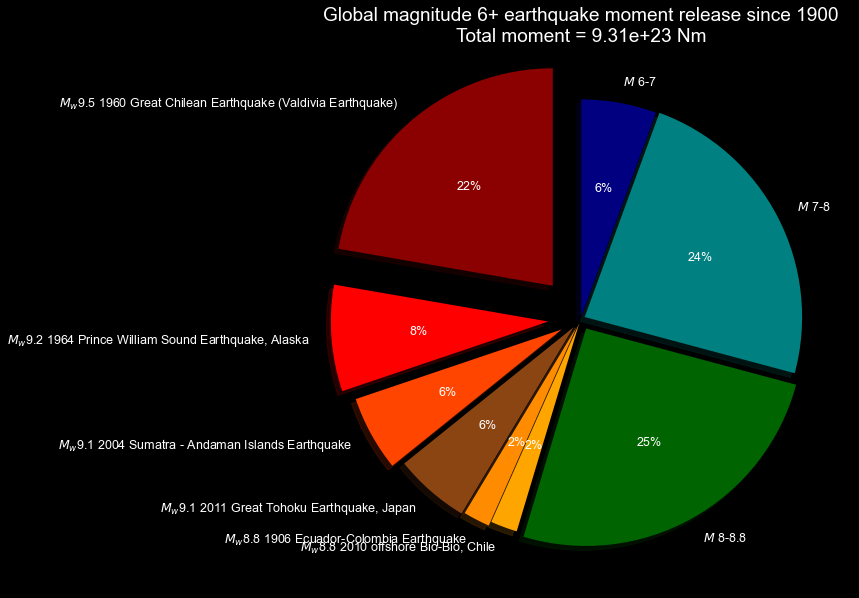

In [151]:
# Now make the plot
labels = []
sizes = []
explodes = []
colors = []

c_9 = ["darkred", "red", "orangered", "saddlebrown"]
c_8 = ["darkorange", "orange"]
for n, (idx, r) in enumerate(df_9.iterrows()):
    print(r["locname"])
    labels.append("$M_w$"+str(r["mag"]) + " " + r["locname"])
    sizes.append((100*r["mo"]*1e-7)/total_moment)
    explodes.append((4-n)*0.05)
    colors.append(c_9[n])
for n, (idx, r) in enumerate(df_88.iterrows()):
    print(r["locname"])
    labels.append("$M_w$"+str(r["mag"]) + " " + r["locname"])
    sizes.append((100*r["mo"]*1e-7)/total_moment)
    explodes.append((2-n)*0.02)
    colors.append(c_8[n])
    
labels.append("$M$ 8-8.8")
sizes.append((100*np.sum(df_8["mo"])*1e-7)/total_moment)
explodes.append(0.05)
colors.append("darkgreen")

labels.append("$M$ 7-8")
sizes.append((100*np.sum(df_7["mo"])*1e-7)/total_moment)
explodes.append(0.02)
colors.append("teal")

labels.append("$M$ 6-7")
sizes.append((100*np.sum(df_6["mo"])*1e-7)/total_moment)
explodes.append(0.01)
colors.append("navy")

plt.style.use('dark_background')
plt.rc('font', family='Arial', size=12.5)
fig = plt.figure(figsize=(10,10))
ax1 = plt.subplot()
_, _, autotexts = ax1.pie(sizes, explode=explodes, labels=labels, autopct='%1.0f%%',
        shadow=True, startangle=90, colors=colors)
for autotext in autotexts:
    autotext.set_color('white')
np.sum(sizes)
plt.title("Global magnitude 6+ earthquake moment release since 1900\nTotal moment = {:.2e} Nm".format(total_moment), fontsize=19)
plt.savefig("/Users/sph1r17/Downloads/moment.pdf")